In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import MNIST dataset

In [2]:
#import the tensorflow dataset
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]
single_image.shape

(28, 28)

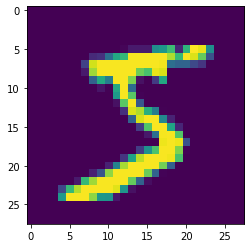

In [6]:
#Shows the image based on the data
plt.imshow(single_image)

In [7]:
y_train[0]

5

# One-hot encoding

In [8]:
#perform one-hot encoding on the y_train and y_test
from tensorflow.keras.utils import to_categorical
y_train.shape

(60000,)

In [9]:
y_cat_train=to_categorical(y_train,num_classes=10)
y_cat_test=to_categorical(y_test,10)

In [10]:
y_cat_train.shape

(60000, 10)

In [11]:
y_cat_test.shape

(10000, 10)

In [12]:
#y_cat_train[0]=5
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
single_image.max()

255

In [14]:
single_image.min()

0

### Normalize the data 

In [15]:
x_train=x_train/255
x_test=x_test/255

In [16]:
scaled_image=x_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

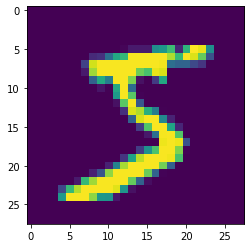

In [17]:
#the image remains the same even after its scaled
plt.imshow(scaled_image)

In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1365 - accuracy: 0.9596 - val_loss: 0.0553 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0415 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0362 - val_accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0414 - val_accuracy: 0.9873
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0545 - val_accuracy: 0.9841


# Evaluate the Model

In [23]:
metrics=pd.DataFrame(model.history.history)

In [24]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136506,0.959650,0.055289,0.9810
1,0.047651,0.985600,0.041477,0.9851
2,0.031245,0.989900,0.036212,0.9875
3,0.021842,0.993083,0.041379,0.9873
4,0.014289,0.995367,0.054501,0.9841


<AxesSubplot:>

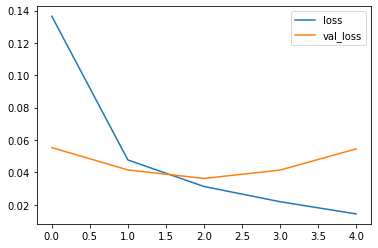

In [25]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

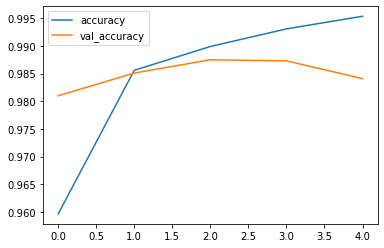

In [26]:
metrics[['accuracy','val_accuracy']].plot()

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.054500654339790344, 0.9840999841690063]

In [29]:
preds_prob=model.predict(x_test)
predictions=np.argmax(preds_prob,axis=1)

# Classification report and confusion matrix

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    3,    1,    0,    0,    1,    0,    1,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   0,    2, 1021,    0,    1,    0,    1,    6,    1,    0],
       [   0,    0,    2,  999,    0,    6,    0,    0,    1,    2],
       [   0,    3,    0,    0,  958,    0,    2,    0,    0,   19],
       [   1,    0,    0,    5,    0,  886,    0,    0,    0,    0],
       [   5,    5,    2,    1,    1,   13,  930,    0,    1,    0],
       [   0,   10,    9,    3,    1,    0,    0,  998,    3,    4],
       [   3,    3,    2,    5,    0,    5,    2,    2,  947,    5],
       [   0,    4,    1,    1,    3,    5,    0,    1,    0,  994]],
      dtype=int64)

<AxesSubplot:>

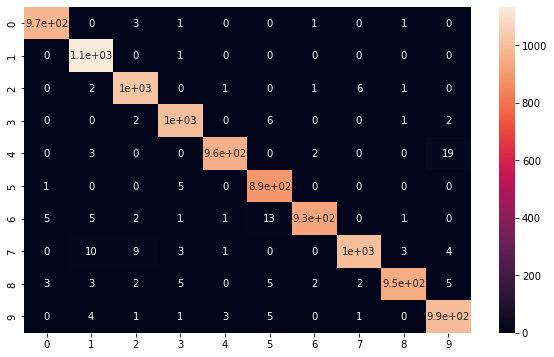

In [33]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [34]:
my_number = x_test[3]

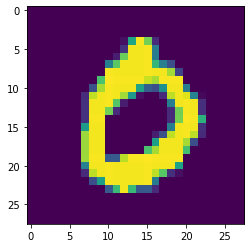

In [35]:
plt.imshow(my_number.reshape(28,28))

In [36]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)))

0